In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Input

In [36]:
mydata = pd.read_csv('data.csv')
mydf = pd.DataFrame(data = mydata)

## Data Preprocessing
(1) Modifying datas and droping useless data

In [37]:
mydf = mydf[(mydf['system'] == 'MacOS') | (mydf['system'] =='Windows')] 
mydf = mydf.reset_index()
i = 0

for i in range(len(mydf)):
    ## money
    if mydf.loc[i,'money'] == '8000以下':
        mydf.loc[i,'money'] = 'low'
    elif mydf.loc[i,'money'] == '8001~11999':
        mydf.loc[i,'money'] = 'medium'
    else:
        mydf.loc[i,'money'] = 'high'
    ## time
    if mydf.loc[i,'time'] == '0~30 小時':
        mydf.loc[i,'time'] = 'low'
    elif mydf.loc[i,'time'] == '31~60 小時':
        mydf.loc[i,'time'] = 'medium'
    else:
        mydf.loc[i,'time'] = 'high'
    ## satisfy
    if mydf.loc[i,'apple'] == '是':
        mydf.loc[i,'apple'] = 1
    else:
        mydf.loc[i,'apple'] = 0
    if mydf.loc[i,'satisfy'] == '非常同意':
        mydf.loc[i, 'satisfy'] = '5'
    elif mydf.loc[i,'satisfy'] == '同意':
        mydf.loc[i, 'satisfy'] = '4'
    elif mydf.loc[i,'satisfy'] == '普通':
        mydf.loc[i, 'satisfy'] = '3'
    elif mydf.loc[i,'satisfy'] == '不同意':
        mydf.loc[i,'satisfy'] = '2'
    else:
        mydf.loc[i,'satisfy'] = '1'
    ## usage
    if mydf.loc[i,'communication'] in  [1, 2, 3]:
        mydf.loc[i,'communication'] = 1
    else:
        mydf.loc[i,'communication'] = 0
    if mydf.loc[i,'social'] in [1, 2, 3]:
        mydf.loc[i,'social'] = 1
    else:
        mydf.loc[i,'social'] = 0
    if mydf.loc[i,'word_processing'] in [1, 2, 3]:
        mydf.loc[i,'word_processing'] = 1
    else:
        mydf.loc[i,'word_processing'] = 0
    if mydf.loc[i,'entertainment'] in [1, 2, 3]:
        mydf.loc[i,'entertainment'] = 1
    else:
        mydf.loc[i,'entertainment'] = 0
    if mydf.loc[i,'reading'] in [1, 2, 3]:
        mydf.loc[i,'reading'] = 1
    else:
        mydf.loc[i,'reading'] = 0
    if mydf.loc[i,'coding'] in [1, 2, 3]:
        mydf.loc[i,'coding'] = 1
    else:
        mydf.loc[i,'coding'] = 0
    if mydf.loc[i,'creation'] in [1, 2, 3]:
        mydf.loc[i,'creation'] = 1
    else:
        mydf.loc[i,'creation'] = 0
mydf['temp'] = 'na'
mydf.loc[(mydf.department == '電資學院及其相關科系'), 'temp'] = 'eecs'
mydf.loc[(mydf.department == '工學院及其相關科系') & (mydf.department == '理學院及其相關科系'), 'temp'] = 's&t'
mydf.loc[(mydf.department != '工學院及其相關科系') & (mydf.department != '理學院及其相關科系') & (mydf.department != '電資學院及其相關科系'), 'temp'] = 'orthers'
mydf = mydf.drop(columns = 'department')
mydf = mydf.rename(columns = {'temp': 'department'})
mydf = mydf.drop(['index'], axis=1)
mydf = mydf.drop(['gender','department','grade','time'], axis=1)
mydf

money   system  communication  social  word_processing  entertainment  \
0    medium    MacOS              0       0                1              1   
1    medium    MacOS              0       0                1              1   
2    medium    MacOS              0       0                1              1   
3    medium    MacOS              1       0                1              0   
4    medium    MacOS              0       0                0              1   
..      ...      ...            ...     ...              ...            ...   
215  medium  Windows              0       0                1              0   
216     low  Windows              1       1                1              0   
217     low  Windows              1       1                0              1   
218  medium  Windows              1       1                1              0   
219  medium  Windows              0       0                1              1   

     reading  coding  creation apple satisfy  
0          0       1         0     1       4  
1          0       1         0     1       5  
2          0       1         0     1       4  
3          0       1         0     1       4  
4          1       1         0     1       4  
..       ...     ...       ...   ...     ...  
215        1       1         0     1       4  
216        0       0         0     0       4  
217        0       0         0     0       4  
218        0       0         0     1       5  
219        1       0         0     1       4  

[220 rows x 11 columns]

(2) Data visulization

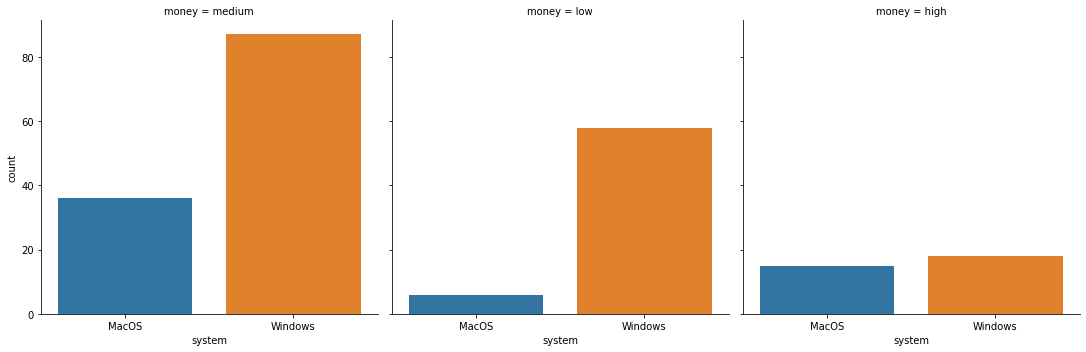

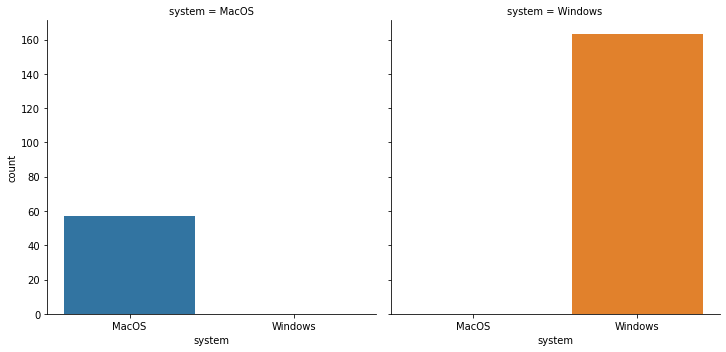

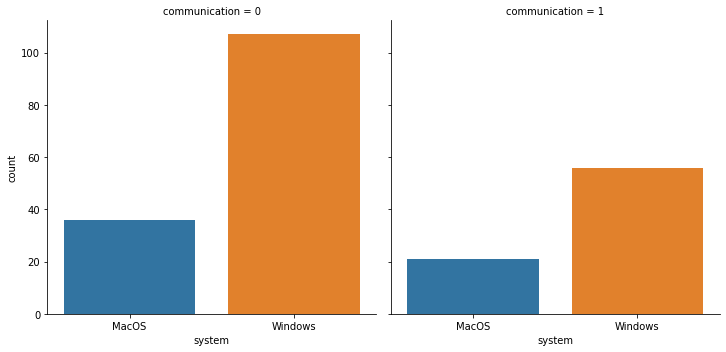

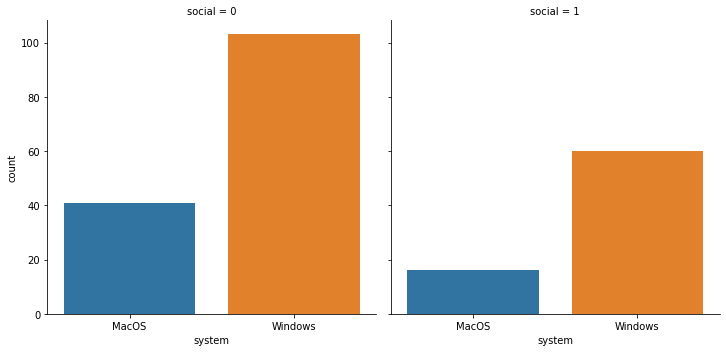

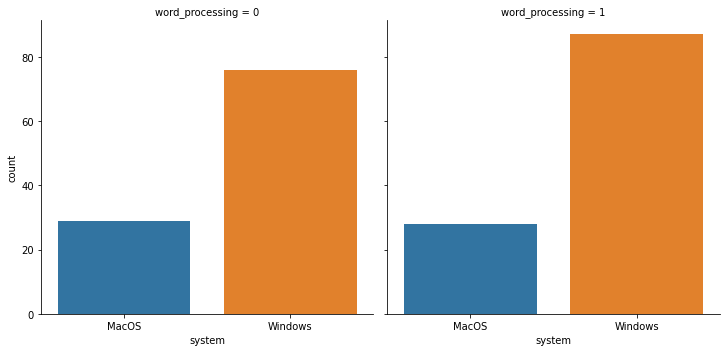

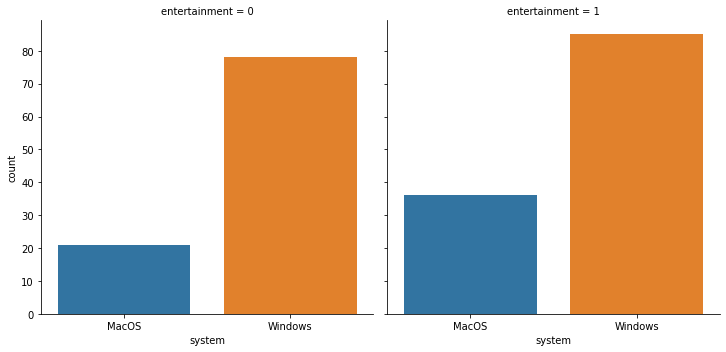

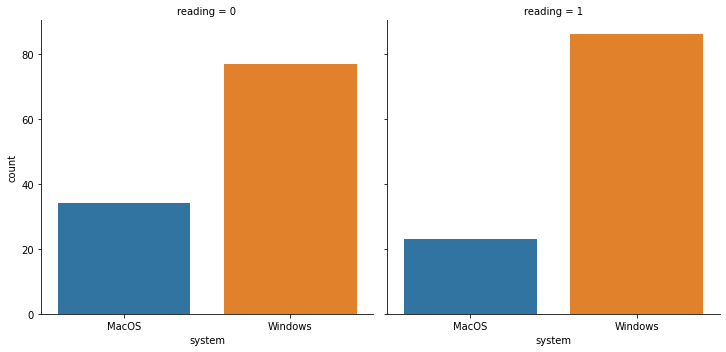

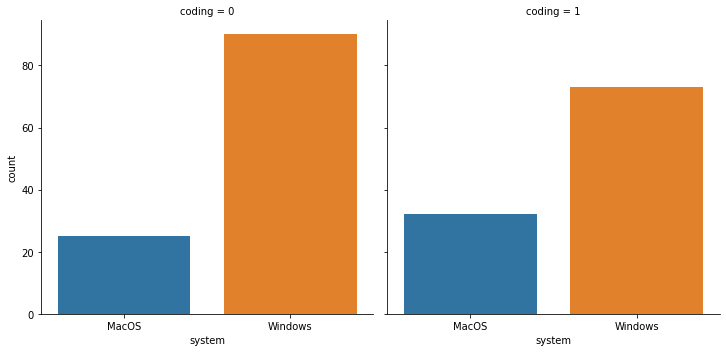

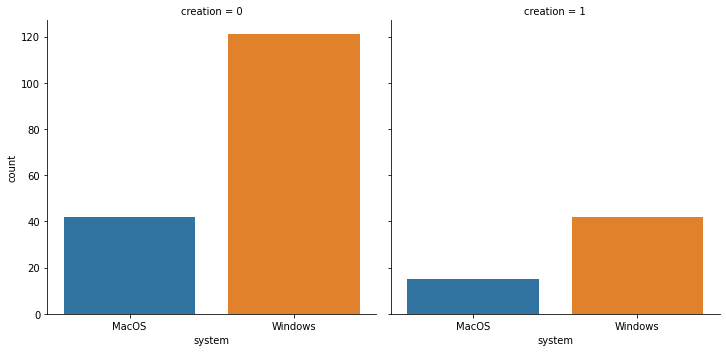

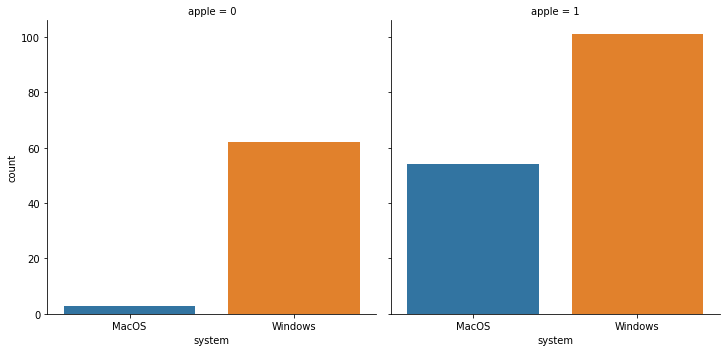

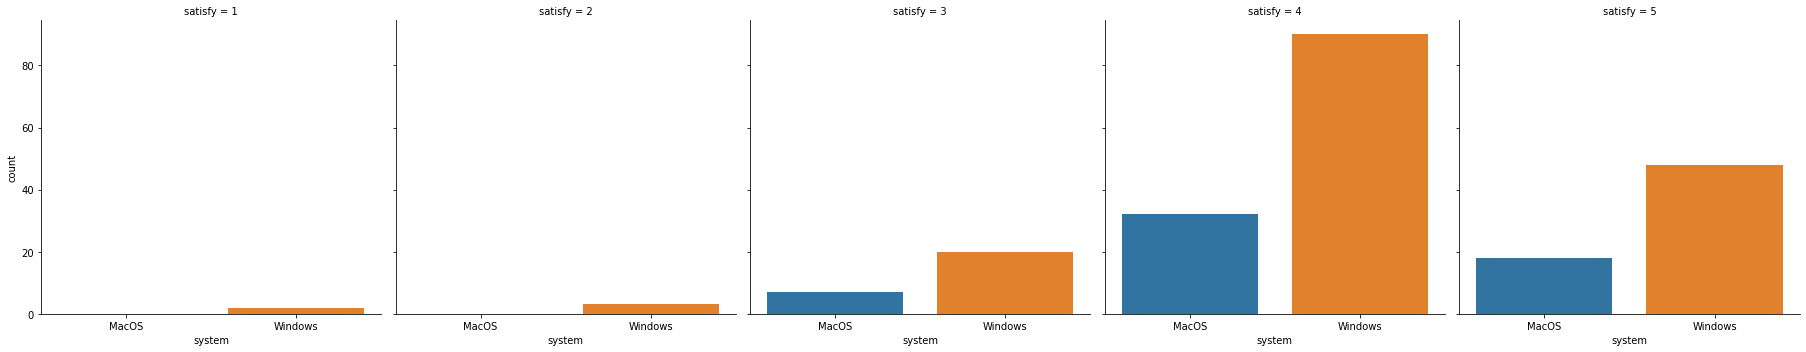

In [38]:
import seaborn as sns
for cols in mydf.columns:
    sns.catplot(x="system", data=mydf, col=cols,kind="count")

(3) Shuffling

In [39]:
from sklearn.utils import shuffle
mydf = shuffle(mydf)

(4) Data Augmentation

In [40]:
aug_mydf = pd.DataFrame(mydf[:150].copy(deep=True)).reset_index()
aug_mydf = aug_mydf.drop(['index'], axis=1)
noaug_mydf = pd.DataFrame(mydf[:150].copy(deep=True)).reset_index()
noaug_mydf = noaug_mydf.drop(['index'], axis=1)
mydf = pd.DataFrame(mydf[150:]).reset_index()
mydf = mydf.drop(['index'], axis=1)
weights = []
for i in range(len(aug_mydf)):
    if aug_mydf.loc[i,'satisfy'] == '5':
        new_row = pd.Series(aug_mydf.loc[i])
        aug_mydf = aug_mydf.append(new_row)
        aug_mydf = aug_mydf.append(new_row)
        weights.append(3)
    elif aug_mydf.loc[i,'satisfy'] == '4':
        new_row = pd.Series(aug_mydf.loc[i])
        aug_mydf = aug_mydf.append(new_row)
        weights.append(2)
    elif aug_mydf.loc[i,'satisfy'] == '3':
        weights.append(1)
    elif aug_mydf.loc[i,'satisfy'] == '2':
        weights.append(0)
        aug_mydf = aug_mydf.drop(i)
    else:
        weights.append(-1)
        if aug_mydf.loc[i, 'system'] == 'Windows':
            aug_mydf.loc[i, 'system'] = 'MacOS'
        else:
            aug_mydf.loc[i, 'system'] = 'Windows'

(5) Generating features(X) and target(y)

In [41]:
aug_X = aug_mydf.drop(['satisfy', 'system'], axis=1)
aug_y = aug_mydf['system']
aug_X = pd.get_dummies(aug_X)
noaug_X = noaug_mydf.drop(['satisfy', 'system'], axis=1)
noaug_y = noaug_mydf['system']
noaug_X = pd.get_dummies(noaug_X)
X_test = mydf.drop(['satisfy', 'system'], axis=1)
y_test = mydf['system']
X_test = pd.get_dummies(X_test)

## Results
### Model Construction

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
forest_100 = RandomForestClassifier(n_estimators = 100, class_weight='balanced')
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 20)
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
from sklearn.svm import LinearSVC
svm = LinearSVC(C=10, tol=1e-5)


### Random Forest
with data augmentation

In [43]:
forest_100.fit(noaug_X, noaug_y, sample_weight=weights)
y_pred = forest_100.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:
[[ 8 10]
 [15 37]]

Accuracy: 0.6429
              precision    recall  f1-score   support

       MacOS       0.35      0.44      0.39        18
     Windows       0.79      0.71      0.75        52

    accuracy                           0.64        70
   macro avg       0.57      0.58      0.57        70
weighted avg       0.67      0.64      0.66        70



### Naive-Bayes

In [44]:
GaussianNB.fit(noaug_X, noaug_y, sample_weight=weights)
y_pred = GaussianNB.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:
[[14  4]
 [23 29]]

Accuracy: 0.6143
              precision    recall  f1-score   support

       MacOS       0.38      0.78      0.51        18
     Windows       0.88      0.56      0.68        52

    accuracy                           0.61        70
   macro avg       0.63      0.67      0.60        70
weighted avg       0.75      0.61      0.64        70



### K Nearest Neighbors

In [45]:
Knn.fit(aug_X, aug_y)
y_pred = Knn.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:
[[ 5 13]
 [10 42]]

Accuracy: 0.6714
              precision    recall  f1-score   support

       MacOS       0.33      0.28      0.30        18
     Windows       0.76      0.81      0.79        52

    accuracy                           0.67        70
   macro avg       0.55      0.54      0.54        70
weighted avg       0.65      0.67      0.66        70



### Logistic Regression

In [46]:
Logistic.fit(noaug_X, noaug_y, sample_weight=weights)
y_pred = Logistic.predict(X_test)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred) )
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:
[[ 6 12]
 [10 42]]

Accuracy: 0.6857
              precision    recall  f1-score   support

       MacOS       0.38      0.33      0.35        18
     Windows       0.78      0.81      0.79        52

    accuracy                           0.69        70
   macro avg       0.58      0.57      0.57        70
weighted avg       0.67      0.69      0.68        70



### Linear SVM


In [47]:
svm.fit(noaug_X, noaug_y,sample_weight=weights)
y_pred = svm.predict(X_test) 
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix:
[[ 6 12]
 [10 42]]

Accuracy: 0.6857
              precision    recall  f1-score   support

       MacOS       0.38      0.33      0.35        18
     Windows       0.78      0.81      0.79        52

    accuracy                           0.69        70
   macro avg       0.58      0.57      0.57        70
weighted avg       0.67      0.69      0.68        70

